# Model reduction_tutorial_week_9

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
df = pd.read_csv('data/splityield.txt', sep="\\t", engine="python")

# Display the first few rows
df

,yield,block,irrigation,density,fertilizer
0,90,A,control,low,N
1,95,A,control,low,P
2,107,A,control,low,NP
3,92,A,control,medium,N
4,89,A,control,medium,P
...,...,...,...,...,...
67,131,D,irrigated,medium,P
68,126,D,irrigated,medium,NP
69,116,D,irrigated,high,N
70,136,D,irrigated,high,P


In [10]:
df = df.rename(columns={"yield":"yield_output"})
df

,yield_output,block,irrigation,density,fertilizer
0,90,A,control,low,N
1,95,A,control,low,P
2,107,A,control,low,NP
3,92,A,control,medium,N
4,89,A,control,medium,P
...,...,...,...,...,...
67,131,D,irrigated,medium,P
68,126,D,irrigated,medium,NP
69,116,D,irrigated,high,N
70,136,D,irrigated,high,P


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   yield_output              72 non-null     int64 
 1   block                     72 non-null     object
 2   irrigation                72 non-null     object
 3   density                   72 non-null     object
 4   fertilizer                72 non-null     object
 5   block_irrigation          72 non-null     object
 6   block_irrigation_density  72 non-null     object
dtypes: int64(1), object(6)
memory usage: 4.1+ KB


In [12]:
df['block_irrigation'] = df['block'].astype(str) + "_" + df['irrigation'].astype(str)
df['block_irrigation_density'] = df['block_irrigation'].astype(str) + "_" + df['density'].astype(str)

In [38]:
model = mixedlm("yield_output ~ irrigation * density * fertilizer", df, groups="block_irrigation_density")
result = model.fit()

# Summary of results
print(result.summary())

                                 Mixed Linear Model Regression Results
Model:                            MixedLM                Dependent Variable:                yield_output
No. Observations:                 72                     Method:                            REML        
No. Groups:                       24                     Scale:                             86.3554     
Min. group size:                  3                      Log-Likelihood:                    -218.8310   
Max. group size:                  3                      Converged:                         Yes         
Mean group size:                  3.0                                                                   
--------------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------------------------------

In [41]:
result.aic

nan

In [24]:
from statsmodels.formula.api import mixedlm
model = mixedlm("yield_output ~ (irrigation + density + fertilizer)", df, groups="block", re_formula="~1")
result = model.fit()

# Summary of results
print(result.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    yield_output
No. Observations:     72         Method:                REML        
No. Groups:           4          Scale:                 177.9255    
Min. group size:      18         Log-Likelihood:        -273.4760   
Max. group size:      18         Converged:             Yes         
Mean group size:      18.0                                          
--------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept                85.264    3.851 22.143 0.000  77.717 92.811
irrigation[T.irrigated]  21.444    3.144  6.821 0.000  15.282 27.607
density[T.low]          -10.042    3.851 -2.608 0.009 -17.589 -2.495
density[T.medium]         0.833    3.851  0.216 0.829  -6.714  8.380
fertilizer[T.NP]         12.750    3.851  3.311 0.

/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [26]:
result.aic

nan

In [15]:
model = mixedlm("yield_output ~ (irrigation + density + fertilizer)", df, groups="block", re_formula="~irrigation + density")
result = model.fit()

# Summary of results
print(result.summary())

                           Mixed Linear Model Regression Results
Model:                        MixedLM            Dependent Variable:            yield_output
No. Observations:             72                 Method:                        REML        
No. Groups:                   4                  Scale:                         164.7363    
Min. group size:              18                 Log-Likelihood:                -278.4666   
Max. group size:              18                 Converged:                     No          
Mean group size:              18.0                                                          
--------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------------------------------
Intercept                                        85.264    6.305 13.524 0.000  72.907 97.621
irrig

/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/p

In [16]:
# Define the fixed effects formula explicitly
formula = "yield_output ~ irrigation + density + fertilizer + irrigation:density + irrigation:fertilizer + density:fertilizer"

# Define the model
model = mixedlm(formula, df, groups="block", re_formula="~irrigation + density")
result = model.fit()

# Summary of results
print(result.summary())

                            Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            yield_output
No. Observations:              72                 Method:                        REML        
No. Groups:                    4                  Scale:                         106.9555    
Min. group size:               18                 Log-Likelihood:                -235.7698   
Max. group size:               18                 Converged:                     No          
Mean group size:               18.0                                                          
---------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                        82.472    4.650 17.737 0.000  73.359  9

/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/jorgegustavorodriguezaboytes/myfirstcode/env/lib/p

## Happiness score

In [6]:
happy_data = pd.read_csv("data/2018.csv",sep=',')
happy_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
happy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
happy_data = happy_data.rename(columns={'GDP per capita': 'GDP_per_capita', 
                                        'Social support': 'Social_support', 
                                        'Healthy life expectancy': 'Healthy_life_exp', 
                                        'Freedom to make life choices': 'Freedom_of_life_choices', 
                                        'Perceptions of corruption': 'Perceptions_of_corruption'})

### Null model

In [19]:
formula = 'Score ~ 1'
model = smf.glm(formula, happy_data, family = sm.families.Poisson())
result = model.fit()
print(result.summary())
predictions = result.predict()
print("AIC", result.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Score   No. Observations:                  156
Model:                            GLM   Df Residuals:                      155
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -293.67
Date:                Wed, 11 Dec 2024   Deviance:                       36.719
Time:                        16:02:13   Pearson chi2:                     36.1
No. Iterations:                     4   Pseudo R-squ. (CS):          7.772e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6819      0.035     48.708      0.0

In [5]:
happy_data_ind_var = happy_data.iloc[:, 3:]
happy_data_dep_var = happy_data.loc[:, ["Score"]]

### Correlation

<Axes: >

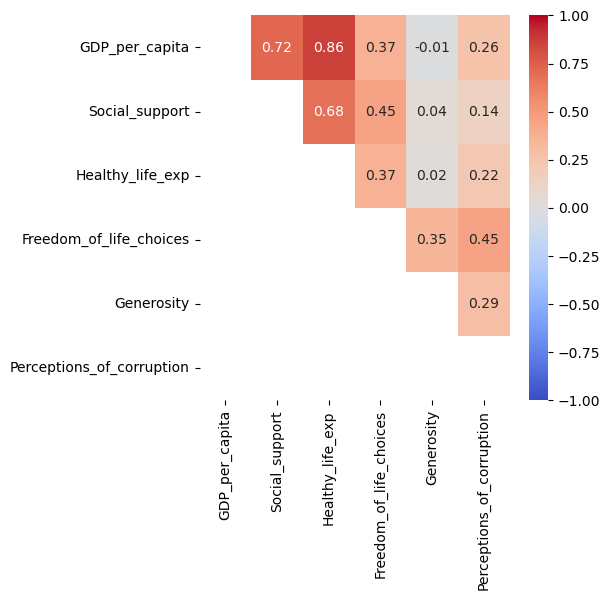

In [20]:
plt.figure(figsize = (5,5))
sns.heatmap(round(happy_data_ind_var.corr(method = 'spearman'),2), mask = np.tril(happy_data_ind_var.corr(method = 'spearman')), vmax=1, vmin=-1, 
            center=0,cmap='coolwarm', annot=True, annot_kws={"size": 10})

array([[<Axes: title={'center': 'GDP_per_capita'}>,
        <Axes: title={'center': 'Social_support'}>],
       [<Axes: title={'center': 'Healthy_life_exp'}>,
        <Axes: title={'center': 'Freedom_of_life_choices'}>],
       [<Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions_of_corruption'}>]],
      dtype=object)

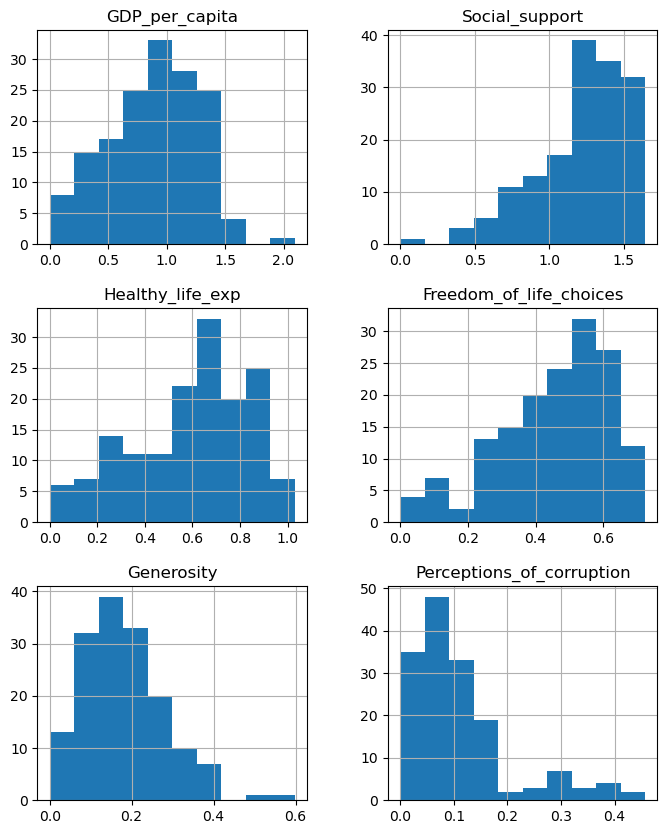

In [21]:
happy_data_ind_var.hist(figsize=(8,10))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(happy_data_ind_var, happy_data_dep_var) # test_size=0.25 

happy_data_train = pd.concat([x_train, y_train], axis=1)
happy_data_test = pd.concat([x_test, y_test], axis=1)

### Reduction by AIC

In [10]:
aic_table = pd.DataFrame()

In [23]:
formula = 'Score ~ GDP_per_capita + Social_support + Healthy_life_exp'
model = smf.glm(formula, happy_data_train, family = sm.families.Poisson())
result = model.fit()
print(result.summary())
print("AIC", result.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Score   No. Observations:                  117
Model:                            GLM   Df Residuals:                      113
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -208.25
Date:                Wed, 11 Dec 2024   Deviance:                       6.6646
Time:                        16:02:32   Pearson chi2:                     6.66
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1790
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0318      0.171  

### Variance inflation factor (VIF)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
happy_data_ind_var

In [37]:
vif = pd.DataFrame()

X=happy_data_ind_var
X_const=add_constant(X)

vif["Variable"] = X_const.columns
vif

,Variable
0,const
1,GDP_per_capita
2,Social_support
3,Healthy_life_exp
4,Freedom_of_life_choices
5,Generosity
6,Perceptions_of_corruption


In [38]:
vif_values = []
# Calculate VIF for each variable
for i in range(X_const.shape[1]):
    vif_value = variance_inflation_factor(X_const.values, i)
    vif_values.append(vif_value)

vif["VIF"] = vif_values
vif

,Variable,VIF
0,const,21.469159
1,GDP_per_capita,3.862909
2,Social_support,2.110644
3,Healthy_life_exp,3.759449
4,Freedom_of_life_choices,1.515044
5,Generosity,1.224693
6,Perceptions_of_corruption,1.472386


In [39]:
X_const

,const,GDP_per_capita,Social_support,Healthy_life_exp,Freedom_of_life_choices,Generosity,Perceptions_of_corruption
0,1.0,1.305,1.592,0.874,0.681,0.202,0.393
1,1.0,1.456,1.582,0.861,0.686,0.286,0.340
2,1.0,1.351,1.590,0.868,0.683,0.284,0.408
3,1.0,1.343,1.644,0.914,0.677,0.353,0.138
4,1.0,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...
151,1.0,0.442,1.073,0.343,0.244,0.083,0.064
152,1.0,0.455,0.991,0.381,0.481,0.270,0.097
153,1.0,0.337,0.608,0.177,0.112,0.224,0.106
154,1.0,0.024,0.000,0.010,0.305,0.218,0.038


## House Prices

In [44]:
house_df = pd.read_csv("data/housing.csv")

In [45]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC